In [1]:
import pandas as pd
import numpy as np
import requests
import psycopg2
import json
import calendar
import time
import re
from dateutil.parser import parse
import matplotlib.pyplot as plt
import decimal
import sklearn

import boto3
import base64
from botocore.exceptions import ClientError

/anaconda3/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
df = pd.read_csv('consolidated_coin_data.csv')
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,ripple,24-Apr-19,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293"
1,ripple,23-Apr-19,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875"
2,ripple,22-Apr-19,0.322277,0.32935,0.320237,0.323934,"1,131,094,080","13,606,823,301"
3,ripple,21-Apr-19,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430"
4,ripple,20-Apr-19,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592"


In [4]:
df['Currency'].value_counts()

litecoin        2305
bitcoin         2305
ripple          2207
stellar         1841
tether          1632
ethereum        1484
eos              780
bitcoin-cash     758
binance-coin     756
cardano          688
Name: Currency, dtype: int64

In [5]:
df.loc[df['Currency'] == 'bitcoin']

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
3392,bitcoin,24-Apr-19,5571.51,5642.04,5418.26,5464.87,"17,048,033,399","96,530,038,144"
3393,bitcoin,23-Apr-19,5399.37,5633.8,5389.41,5572.36,"15,867,308,108","98,417,387,004"
3394,bitcoin,22-Apr-19,5312.49,5422.69,5280.28,5399.37,"14,601,631,648","95,354,207,776"
3395,bitcoin,21-Apr-19,5335.88,5359.93,5257.34,5314.53,"13,731,844,223","93,847,052,256"
3396,bitcoin,20-Apr-19,5304.16,5358.49,5295.88,5337.89,"13,169,647,522","94,248,717,444"
3397,bitcoin,19-Apr-19,5298.15,5336.68,5233.34,5303.81,"13,780,238,655","93,638,345,002"
3398,bitcoin,18-Apr-19,5251.48,5319.99,5250.51,5298.39,"13,256,489,918","93,532,402,741"
3399,bitcoin,17-Apr-19,5236.14,5274.28,5219.21,5251.94,"12,438,480,677","92,702,617,458"
3400,bitcoin,16-Apr-19,5066.58,5238.95,5055.19,5235.56,"11,618,660,197","92,404,613,297"
3401,bitcoin,15-Apr-19,5167.32,5196.61,5024.07,5067.11,"12,290,155,061","89,422,237,603"


In [6]:
df['UnixDate'] = ""
df['UnixDate'] = df['Date'].apply(lambda x : calendar.timegm(time.strptime(parse(x).date().strftime("%m-%d-%Y"), '%m-%d-%Y')))
df['Date'] = df['Date'].apply(lambda x : parse(x).date().strftime("%m-%d-%Y"))
df['Open'] = df['Open'].apply(lambda x : float(x.replace(',','')))
df['High'] = df['High'].apply(lambda x : float(x.replace(',','')))
df['Close'] = df['Close'].apply(lambda x : float(x.replace(',','')))
df['Low'] = df['Low'].apply(lambda x : float(x.replace(',','')))
df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400
5,ripple,04-19-2019,0.337062,0.337147,0.329577,0.331902,"1,025,167,554","13,930,181,415",1555632000
6,ripple,04-18-2019,0.335476,0.345289,0.335335,0.337065,"1,092,731,769","14,146,855,828",1555545600
7,ripple,04-17-2019,0.327157,0.340327,0.322388,0.335453,"1,137,811,633","14,079,207,980",1555459200
8,ripple,04-16-2019,0.320998,0.327308,0.319261,0.327218,"799,796,781","13,733,570,917",1555372800
9,ripple,04-15-2019,0.328841,0.331551,0.318090,0.320913,"934,107,164","13,468,978,197",1555286400


In [7]:
df.groupby(df['Currency'])['Date'].min().sort_values()

Currency
bitcoin         01-01-2014
litecoin        01-01-2014
ripple          01-01-2014
stellar         01-01-2015
ethereum        01-01-2016
tether          01-01-2016
binance-coin    01-01-2018
bitcoin-cash    01-01-2018
cardano         01-01-2018
eos             01-01-2018
Name: Date, dtype: object

In [8]:
df_focus = df.loc[df['Currency'].isin(['ethereum','ripple','litecoin','bitcoin','stellar','cardano'])]
df_focus = df_focus.loc[df_focus['UnixDate'] > 1438905600]
df_focus.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,ripple,04-24-2019,0.321114,0.321282,0.296982,0.302318,"1,517,791,002","12,698,877,293",1556064000
1,ripple,04-23-2019,0.323844,0.328396,0.320919,0.321222,"1,077,333,990","13,492,933,875",1555977600
2,ripple,04-22-2019,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",1555891200
3,ripple,04-21-2019,0.328678,0.329627,0.318746,0.322449,"1,005,803,846","13,533,407,430",1555804800
4,ripple,04-20-2019,0.331871,0.333213,0.324969,0.328476,"931,570,799","13,786,384,592",1555718400


In [9]:
df_focus['Currency'].value_counts()

ethereum    1483
stellar     1473
litecoin    1473
ripple      1473
bitcoin     1473
cardano      688
Name: Currency, dtype: int64

In [10]:
df_pivot = pd.pivot_table(df_focus, index=['UnixDate'], values='Open',columns='Currency',aggfunc='first')
df_pivot.count()

Currency
bitcoin     1471
cardano      686
ethereum    1471
litecoin    1471
ripple      1471
stellar     1471
dtype: int64

In [11]:
df_pivot.sort_values(by='UnixDate',ascending=False).head(5)

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1566000000,10358.722541,0.046869,185.531660,74.905089,0.261885,0.068937
1565913600,10319.420346,0.047536,188.644251,76.315247,0.265075,0.070278
1565827200,10038.421709,0.047090,186.683509,76.133270,0.263707,0.069198
1565740800,10889.487743,0.052554,208.603991,84.420349,0.296719,0.074178
1565654400,11385.052497,0.052932,211.342701,85.746428,0.300661,0.075394


In [12]:
df_rec = df_pivot.loc[df_pivot.index.get_level_values(level = 'UnixDate') >= 1510832000] 
df_rec.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1490832000,1042.21,NaN,53.12,4.18,0.010125,0.002022
1490918400,1026.64,NaN,51.75,7.02,0.013049,0.002270
1491004800,1071.71,NaN,50.03,6.65,0.021743,0.002349
1491091200,1080.61,NaN,50.74,6.86,0.021938,0.002607
1491177600,1102.95,NaN,48.82,7.74,0.060291,0.004118


In [13]:
from sklearn import preprocessing
x = df_rec.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_norm = pd.DataFrame(x_scaled)
df_norm.columns = df_rec.columns
df_norm.index = df_rec.index
df_norm.head()

Currency,bitcoin,cardano,ethereum,litecoin,ripple,stellar
UnixDate,,,,,,
1490832000,0.000844,NaN,0.008350,0.000000,0.000000,0.000000
1490918400,0.000000,NaN,0.007339,0.008001,0.000873,0.000279
1491004800,0.002443,NaN,0.006071,0.006959,0.003468,0.000367
1491091200,0.002925,NaN,0.006594,0.007550,0.003526,0.000657
1491177600,0.004136,NaN,0.005178,0.010030,0.014975,0.002354


<Figure size 432x288 with 0 Axes>

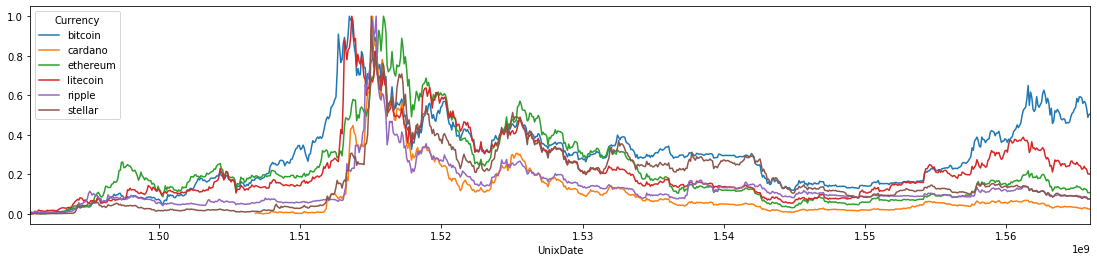

In [14]:
plt.figure()
df_norm.plot(figsize=(19,4))

<Figure size 432x288 with 0 Axes>

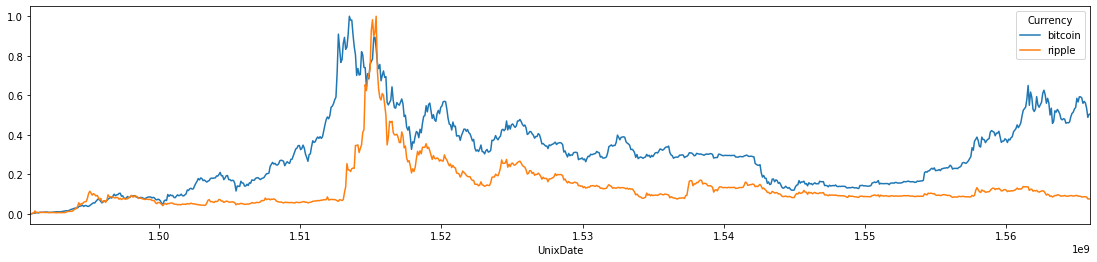

In [15]:
plt.figure()
df_norm[['bitcoin','ripple']].plot(figsize=(19,4))

In [16]:
df_ml = pd.DataFrame(data={'bitcoin':df_norm['bitcoin'].values,'ethereum':df_norm['ethereum'].values,'litecoin':df_norm['litecoin'].values,'ripple':df_norm['ripple'].values},index=df_norm.index)

In [17]:
df_ml.head()

,bitcoin,ethereum,litecoin,ripple
UnixDate,,,,
1490832000,0.000844,0.008350,0.000000,0.000000
1490918400,0.000000,0.007339,0.008001,0.000873
1491004800,0.002443,0.006071,0.006959,0.003468
1491091200,0.002925,0.006594,0.007550,0.003526
1491177600,0.004136,0.005178,0.010030,0.014975


In [35]:
X = df_ml[['ripple','litecoin','ethereum']]
y = df_ml['bitcoin']

In [36]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

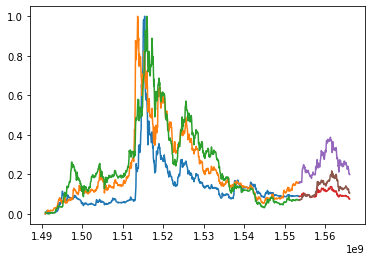

In [37]:
plt.plot(X_train)
plt.plot(X_test)
plt.show()

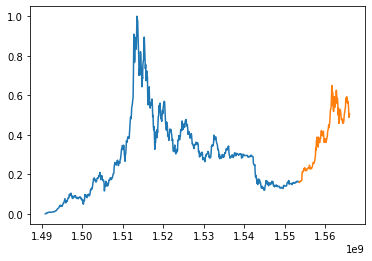

In [38]:
plt.plot(y_train)
plt.plot(y_test)
plt.show()

# LSTM

In [40]:
X_train = np.reshape(X_train.to_numpy(), (X_train.to_numpy().shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.to_numpy(), (X_test.to_numpy().shape[0], 1, X_test.shape[1]))

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model2 = Sequential()
model2.add(layers.LSTM(20, input_shape=(1, 3), return_sequences=True))
model2.add(layers.LSTM(20))
model2.add(layers.Dense(1, activation='relu'))
model2.compile(optimizer="adam", loss="mean_squared_error")
model2.fit(X_train, y_train, epochs=75, verbose=0)

In [42]:
model2.evaluate(X_test, y_test)

145/145 [==============================] - 1s 8ms/sample - loss: 0.0183


0.018305610428596367

In [43]:
m2predictions = model2.predict(X_test)
zipped2 = list(zip(m2predictions,y_test))

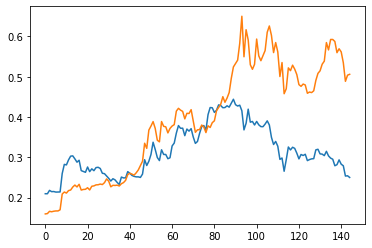

In [44]:
#plt.xticks(zipped[1],y_test.index)
plt.plot(zipped2)

In [77]:
df_focus.loc[df_focus['Currency'] == 'bitcoin'].sort_values(by='UnixDate',ascending=True, axis=0).reset_index().sort_index(ascending=True, axis=0)

,index,Currency,Date,Open,High,Low,Close,Volume,Market Cap,UnixDate
0,4747,bitcoin,08-08-2015,279.740000,279.930000,260.710000,261.000000,"58,533,000","3,778,049,024",1438992000
1,4746,bitcoin,08-09-2015,261.120000,267.000000,260.470000,265.080000,"23,789,600","3,838,130,130",1439078400
2,4745,bitcoin,08-10-2015,265.480000,267.030000,262.600000,264.470000,"20,979,400","3,830,352,069",1439164800
3,4744,bitcoin,08-11-2015,264.340000,270.390000,264.090000,270.390000,"25,433,900","3,917,142,819",1439251200
4,4743,bitcoin,08-12-2015,270.600000,270.670000,265.470000,266.380000,"26,815,400","3,859,888,131",1439337600
5,4742,bitcoin,08-13-2015,266.180000,266.230000,262.840000,264.080000,"27,685,500","3,827,588,724",1439424000
6,4741,bitcoin,08-14-2015,264.130000,267.470000,261.480000,265.680000,"27,091,200","3,851,715,726",1439510400
7,4740,bitcoin,08-15-2015,265.530000,266.670000,261.300000,261.550000,"19,321,100","3,792,757,590",1439596800
8,4739,bitcoin,08-16-2015,261.870000,262.440000,257.040000,258.510000,"29,717,000","3,749,501,856",1439683200
9,4738,bitcoin,08-17-2015,258.490000,260.510000,257.120000,257.980000,"21,617,900","3,742,748,055",1439769600


In [78]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
df = df_focus.loc[df_focus['Currency'] == 'bitcoin'].sort_values(by='UnixDate',ascending=True, axis=0).reset_index()

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [79]:
#df.sort_values(by='UnixDate',ascending=True, axis=0)

In [80]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1247,:]
valid = dataset[1247:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

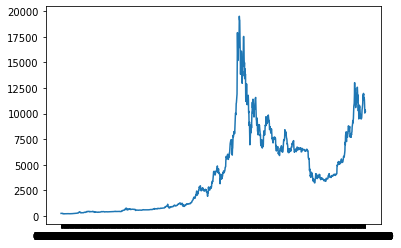

In [81]:
plt.plot(new_data)

In [82]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# create and fit the LSTM network
model4 = Sequential()
model4.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model4.add(LSTM(units=50))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model4.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Train on 1217 samples
1217/1217 - 24s - loss: 0.0024


In [83]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

507.18808704129845

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


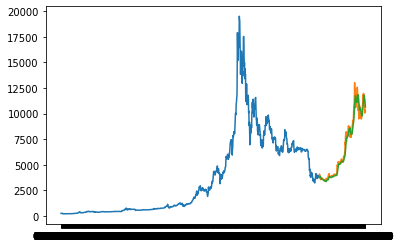

In [84]:
train = new_data[:1247]
valid = new_data[1247:]
valid['Predictions'] = closing_price

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

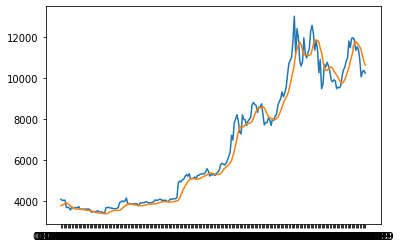

In [95]:
plt.plot(valid[['Close','Predictions']])

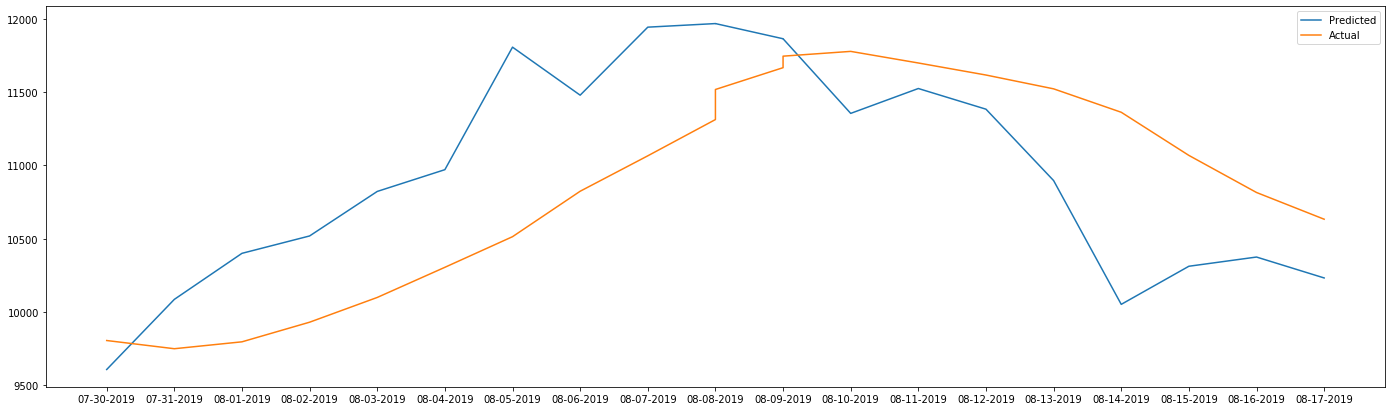

In [108]:
plt.figure(figsize=(24,7))
plt.plot(valid[['Close','Predictions']].tail(21))
plt.legend(['Predicted','Actual'])